<a href="https://colab.research.google.com/github/RickyMacharm/Sentinel_v3.0/blob/master/FXCM_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###First Time Run
Run his cell only if you are running this notebook for the very first time on colab or on a new `Google` account. If the cell is commented, Higlight the contents and use a combination of `'ctrl'` plus `'/'` keys to uncomment the cell.

Click on the url given:( `Go to this URL in a browser: https://accounts.google.com/o/oauth2/XXXXX.....`) after you run the cell and choose the `Google` account you intend to use for running colab and get the authorization code generated.

In [0]:
# from fastai import *
# from fastai.tabular import *
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/"
# base_dir = root_dir + 'FXCM_Algo/'

# path = Path(base_dir)

# path.mkdir(parents=True, exist_ok=True)


# import os
# os.chdir(path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### Next Time Run
If you have ran this notebook on colab on the same Google account before now and all the folders have been created, you can run this cell after the first runtime has expired. Colab as of 2019 only allows `12` hours of free runtime before resetting.

If the cell is commented, Higlight the contents and use a combination of `'ctrl'` plus `'/'` keys to uncomment the cell.

Click on the url given:( `Go to this URL in a browser: https://accounts.google.com/o/oauth2/XXXXX.....`) after you run the cell and choose the `Google` account you intend to use for running colab and get the authorization code generated.

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

# from fastai.basics import *
# path = Path('/content/drive/My Drive/FXCM_Algo')

# #we want to change the present working directory to that of path assigned above.
# import os
# os.chdir(path)

### FXCM
We are going to install and import the FXCM dependencies

In [0]:
!pip install fxcmpy

import fxcmpy

     |████████████████████████████████| 204kB 7.8MB/s 
  Created wheel for socketIO-client: filename=socketIO_client-0.7.2-cp36-none-any.whl size=23707 sha256=fc09ea409d8db6d473a4ccd9ce601c41851218bd4d7bb57754d3bc332a5c695d
  Stored in directory: /root/.cache/pip/wheels/bd/5d/9f/ebc0c223ec59641877c817eb10442627e69af88c126f1f53a8
Successfully built socketIO-client


At this point you must have gone to [fxcm.com](https://www.fxcm.com/za/forex-trading-demo/) website and have already opened a demo account. You can therefore use the API Token you generated to connect to that account.

This [documentation](https://www.fxcm.com/fxcmpy/04_data_tables.html) has the details you need.

In [0]:
# Pesky warnings averted!
import warnings
warnings.filterwarnings('ignore')

I am going to use the `path.ls()` method from `fastai` to see the contents of the created folder and also the path.

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/FXCM_Algo/fxcm.cfg')]

The bash command `!ls` only shows the contents of the present working directory.

In [0]:
!ls

'^DJI.csv'   fxcm.cfg   fxcm.log


Our file is in the created folder. We now go ahead to connect to our FXCM account.

We create a variable called `api` for that purpose. You can choose any variable name you prefer.

In [0]:
api = fxcmpy.fxcmpy(config_file='fxcm.cfg')

We now look to see the instruments available to use from FXCM for our anlysis.

In [0]:
instruments = api.get_instruments()
print(instruments)
len(instruments)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'USDOLLAR', 'US2000', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'WHEATF', 'CORNF', 'Bund', 'XAU/USD', 'XAG/USD', 'EMBasket', 'JPYBasket', 'BTC/USD', 'BCH/USD', 'ETH/USD', 'LTC/USD', 'XRP/USD', 'CryptoMajor', 'USEquities']


73

We can see that we have about 73 instruments (it used to be 62 last I checked).
We can now choose any for our purpose.

### Historical Data

We will retrieve the historical data of the instrument of our choice.

The parameter `period` must be one of `m1`, `m5`, `m15`, `m30`, `H1`, `H2`, `H3`, `H4`, `H6`, `H8`, `D1`, `W1`, `M1`

In [0]:
import datetime as dt

start = dt.datetime(2017, 1, 1); end = dt.datetime(2002, 1, 1)

In [0]:
#candles = api.get_candles('US30', period='D1', start=start, stop=end)

candles = api.get_candles('US30', period='D1', number=6000)

In [0]:
len(candles)

4697

In [0]:
candles.tail()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2019-11-03 22:00:00,27372.1,27451.6,27508.1,27363.0,27374.0,27453.2,27511.0,27365.3,436552
2019-11-04 22:00:00,27497.9,27484.8,27559.1,27428.9,27499.1,27487.7,27562.4,27432.4,431734
2019-11-05 22:00:00,27494.9,27509.9,27532.3,27401.9,27496.2,27512.6,27535.3,27403.3,502711
2019-11-06 22:00:00,27708.4,27718.7,27773.4,27445.6,27709.9,27722.8,27778.8,27449.8,241419
2019-11-07 22:00:00,27624.9,27656.2,27718.5,27573.7,27626.1,27658.9,27722.6,27575.1,145787


### Feature Generation

For this section, we will go to `Yahoo!` Finance to download historical data for training since there would be more entries.

In [0]:
df = pd.read_csv('^DJI.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-29,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000
1,1985-01-30,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000
2,1985-01-31,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000
3,1985-02-01,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000
4,1985-02-04,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8768 entries, 0 to 8767
Data columns (total 7 columns):
Date         8768 non-null object
Open         8768 non-null float64
High         8768 non-null float64
Low          8768 non-null float64
Close        8768 non-null float64
Adj Close    8768 non-null float64
Volume       8768 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 479.6+ KB


We have more data to train with in this case.

#### Fastai
we will use the `fastai` module to add some features.

In [0]:
add_datepart(df, 'Date', drop=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8768 entries, 0 to 8767
Data columns (total 20 columns):
Date                8768 non-null datetime64[ns]
Open                8768 non-null float64
High                8768 non-null float64
Low                 8768 non-null float64
Close               8768 non-null float64
Adj Close           8768 non-null float64
Volume              8768 non-null int64
Year                8768 non-null int64
Month               8768 non-null int64
Week                8768 non-null int64
Day                 8768 non-null int64
Dayofweek           8768 non-null int64
Dayofyear           8768 non-null int64
Is_month_end        8768 non-null bool
Is_month_start      8768 non-null bool
Is_quarter_end      8768 non-null bool
Is_quarter_start    8768 non-null bool
Is_year_end         8768 non-null bool
Is_year_start       8768 non-null bool
Elapsed             8768 non-null int64
dtypes: bool(6), datetime64[ns](1), float64(5), int64(8)
memory usage: 1010.5 KB

Next we are going to add `Returns` column and also lag return columns.

In [0]:
df['Returns'] = np.log(df.Close/df.Close.shift(1)) 

lags = 8
cols = []
for lag in range(1,lags + 1):
    col = 'lag_%s' % lag
    df[col] = df.Returns.shift(lag)
    cols.append(col)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8768 entries, 0 to 8767
Data columns (total 29 columns):
Date                8768 non-null datetime64[ns]
Open                8768 non-null float64
High                8768 non-null float64
Low                 8768 non-null float64
Close               8768 non-null float64
Adj Close           8768 non-null float64
Volume              8768 non-null int64
Year                8768 non-null int64
Month               8768 non-null int64
Week                8768 non-null int64
Day                 8768 non-null int64
Dayofweek           8768 non-null int64
Dayofyear           8768 non-null int64
Is_month_end        8768 non-null bool
Is_month_start      8768 non-null bool
Is_quarter_end      8768 non-null bool
Is_quarter_start    8768 non-null bool
Is_year_end         8768 non-null bool
Is_year_start       8768 non-null bool
Elapsed             8768 non-null int64
Returns             8767 non-null float64
lag_1               8766 non-null floa

We are going to set the `Date` column as the index from now moving on.

In [0]:
df.set_index('Date', inplace=True)

In [0]:
df['Direction'] = np.where(df.Returns > 0, 1, -1)

### Plots

Let us make some plots

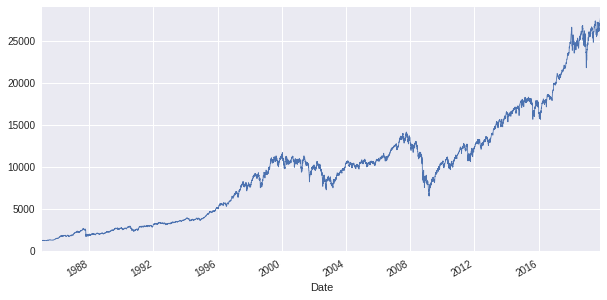

In [0]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

df['Close'].plot(figsize=(10, 5), lw=0.8)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7eff17cd1e80>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7eff177902b0>], dtype=object)

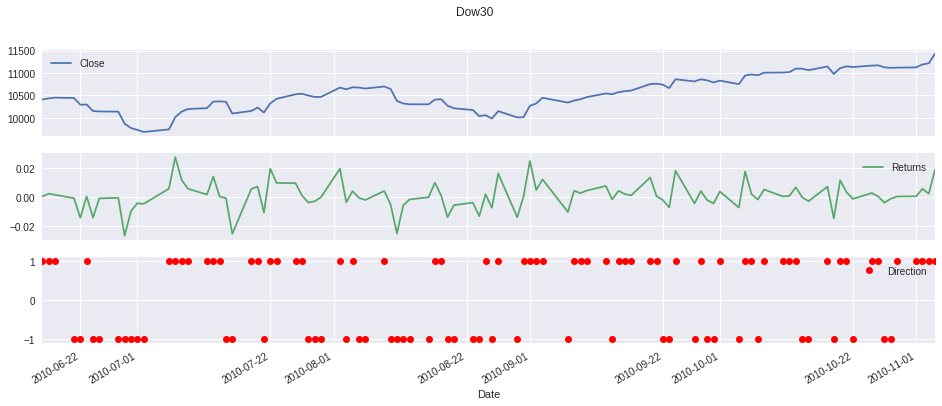

In [0]:
to_plot = [ 'Close','Returns', 'Direction']
df[to_plot].iloc[6400:6500].plot(figsize=(16,6),
           subplots=True,  style= ['-', '-', 'ro'],
           title='Dow30')

### Deep Learning

Let us see how well we are able to predict the next day's Direction.

we will use the `fastai.tabular` framework.

In [0]:
# drop all null values
df.dropna(inplace=True)

Selection of columns required.

In [0]:
dep_var = 'Direction'
cat_names = ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 
             'lag_8', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
             'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
            'Is_year_end', 'Is_year_start', 'Elapsed']

cont_names = []

procs = [FillMissing, Categorify, Normalize]

In [0]:
test = TabularList.from_df(df.iloc[7392:8759].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [0]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(7392,8759)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [0]:
learn.fit(6, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.475248,0.715398,0.546452,00:21
1,0.098178,0.802617,0.544258,00:22
2,0.016259,1.375966,0.541331,00:21
3,0.002819,1.471241,0.541331,00:21
4,0.000407,0.880737,0.542063,00:22
5,0.000098,0.806445,0.544989,00:22


I have played around with many parameters, and the best accuracy I could get was that listed above.

In [0]:
np.digitize(df[cat_names], bins=[0])[:10]

array([[0, 1, 0, 0, ..., 1, 1, 1, 1],
       [0, 0, 1, 0, ..., 1, 1, 1, 1],
       [1, 0, 0, 1, ..., 1, 1, 1, 1],
       [1, 1, 0, 0, ..., 1, 1, 1, 1],
       ...,
       [0, 0, 0, 1, ..., 1, 1, 1, 1],
       [1, 0, 0, 0, ..., 1, 1, 1, 1],
       [0, 1, 0, 0, ..., 1, 1, 1, 1],
       [0, 0, 1, 0, ..., 1, 1, 1, 1]])

### Machine Learning

`Support Vector Machine`

In [0]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [0]:
data = df.copy()

In [0]:
mu = data['Returns'].mean()
v = data['Returns'].std()
bins = [mu - v, mu, mu + v]

train_X, test_X, train_y, test_y = train_test_split(
  data[cat_names].apply(lambda x: np.digitize(x, bins=bins)),
  np.sign(data['Returns']),
  test_size=0.2, random_state=111)

In [0]:
train_X.sort_index(inplace=True)
train_y.sort_index(inplace=True)
test_X.sort_index(inplace=True)
test_y.sort_index(inplace=True)

In [0]:
train_X.head()

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
Date,,,,,,,,,,,,,,,,,,,,,
1985-02-11,1,2,1,1,2,1,1,1,3,3,3,3,1,3,1,1,1,1,1,1,3
1985-02-12,0,1,2,1,1,2,1,1,3,3,3,3,3,3,1,1,1,1,1,1,3
1985-02-14,3,2,0,1,2,1,1,2,3,3,3,3,3,3,1,1,1,1,1,1,3
1985-02-20,1,1,1,3,2,0,1,2,3,3,3,3,3,3,1,1,1,1,1,1,3
1985-02-21,2,1,1,1,3,2,0,1,3,3,3,3,3,3,1,1,1,1,1,1,3


In [0]:
test_X.head()

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
Date,,,,,,,,,,,,,,,,,,,,,
1985-02-13,2,0,1,2,1,1,2,1,3,3,3,3,3,3,1,1,1,1,1,1,3
1985-02-15,1,3,2,0,1,2,1,1,3,3,3,3,3,3,1,1,1,1,1,1,3
1985-02-19,1,1,3,2,0,1,2,1,3,3,3,3,3,3,1,1,1,1,1,1,3
1985-03-06,2,1,3,2,1,2,2,1,3,3,3,3,3,3,1,1,1,1,1,1,3
1985-03-12,1,1,1,1,2,1,3,2,3,3,3,3,3,3,1,1,1,1,1,1,3


In [0]:
model = svm.SVC(C=100, probability=True)
%time model.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


CPU times: user 34.7 s, sys: 85.6 ms, total: 34.8 s
Wall time: 34.8 s


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
train_pred = model.predict(train_X)
accuracy_score(train_y, train_pred)
                           

0.6347937776509205

In [0]:
test_pred = model.predict(test_X)
accuracy_score(test_y, test_pred)

0.5091324200913242

In [0]:

pred = model.predict(np.digitize(data[cat_names], bins=bins))
pred[:18]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [0]:
data['Position'] = pred
data['Strategy'] = data['Position'] * data['Returns']


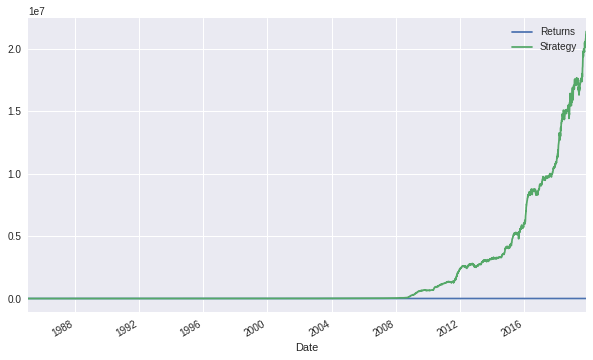

In [0]:
# in-sample
data.loc[train_X.index][['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))

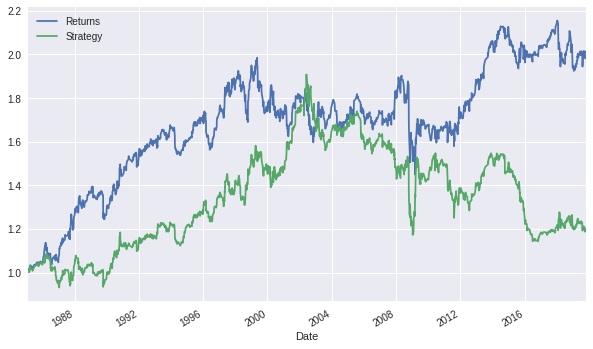

In [0]:
# out-of-sample
data.loc[test_X.index][['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [0]:
model.classes_

array([-1.,  0.,  1.])

In [0]:
pred_proba = model.predict_proba(np.digitize(data[cat_names], bins=bins))
pred_proba[:10]

array([[0.461206, 0.002084, 0.53671 ],
       [0.463711, 0.002126, 0.534163],
       [0.462984, 0.002763, 0.534253],
       [0.463254, 0.002188, 0.534558],
       [0.460999, 0.002136, 0.536865],
       [0.460962, 0.002214, 0.536824],
       [0.463414, 0.001434, 0.535152],
       [0.467933, 0.002417, 0.52965 ],
       [0.46051 , 0.002059, 0.537431],
       [0.456497, 0.00247 , 0.541033]])

In [0]:
pred_proba.max(axis=0)

array([0.507375, 0.005125, 0.561619])

In [0]:
t = 0.53
pred = np.where((pred_proba[:,0] > t) & (pred_proba[:,1] < 0.1), 1, 0 )
pred = np.where((pred_proba[:,1] < 0.1 ) & (pred_proba[:,2] > t), -1, pred )

pred[:20]

array([-1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [0]:
data['Position'] = pred
data['Strategy'] = data['Position'] * data['Returns']

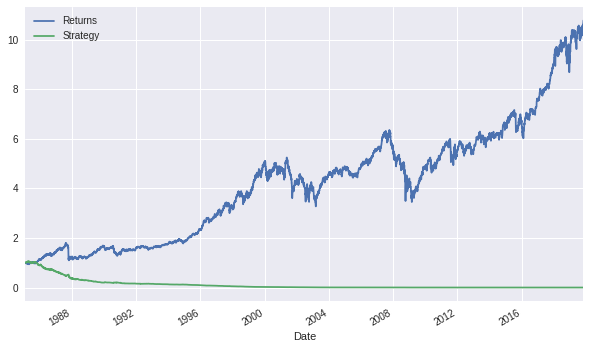

In [0]:
# in-sample
data.loc[train_X.index][['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))

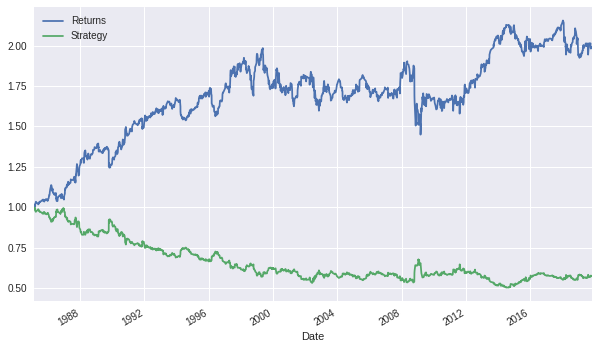

In [0]:
# out-of-sample
data.loc[test_X.index][['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [0]:
data['Position'] = pred

data['Strategy'] = data['Position']*data['Returns']

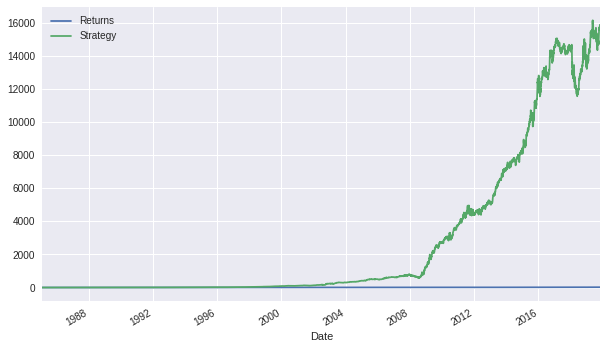

In [0]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))